In [1]:
import cmocean.cm as cm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
prod_region = 'Nooksack'

In [3]:
results_fall = pd.read_csv('results_0_30_fall_noferry.csv')
results_fall['season'] = 'fall'
results_winter = pd.read_csv('results_0_30_winter_noferry.csv')
results_winter['season'] = 'winter'
results_spring = pd.read_csv('results_0_30_spring_noferry.csv')
results_spring['season'] = 'spring'
results_summer = pd.read_csv('results_0_30_summer_noferry.csv')
results_summer['season'] = 'summer'

In [4]:
results_all = pd.concat([results_fall, results_winter, results_spring, results_summer], ignore_index=True)
results_all = results_all.rename(columns={'Unnamed: 0': 'model'})
results_all = results_all[results_all['region'] == prod_region]
results_201905R = results_all[results_all['model'] == '201905R']
results_202111 = results_all[results_all['model'] == '202111']

In [11]:
results_all_norm = results_all.copy()
results_all_norm['rmse'] = results_all['rmse']/results_all['rmse'].max()
results_all_norm['bias'] = results_all['bias']/results_all['bias'].max()
results_all_norm['crmse'] = results_all['crmse']/results_all['crmse'].max()
results_all_norm['swillmott'] = results_all['swillmott']/results_all['swillmott'].max()
results_all_norm['slopedev'] = results_all['slopedev']/results_all['slopedev'].max()
results_all_norm['const'] = results_all['const']/results_all['const'].max()
results_all_norm['systematic'] = results_all['systematic']/results_all['systematic'].max()
results_all_norm['nonsystematic'] = results_all['nonsystematic']/results_all['nonsystematic'].max()
results_all_norm['spread'] = results_all['spread']/results_all['spread'].max()
results_all_norm

results_norm_201905R = results_all_norm[results_all_norm['model'] == '201905R']
results_norm_202111 = results_all_norm[results_all_norm['model'] == '202111']

In [22]:
def split_into_seasons(results_model):
    # results_model_radar = results_model[['season', 'rmse', 'crmse', 'swillmott', 'systematic', 'nonsystematic', 'spread']]  # remove spread from here because it goes negative
    results_model_radar = results_model[['season', 'rmse', 'crmse', 'swillmott', 'systematic', 'nonsystematic']]  # remove spread from here because it goes negative
    categories = results_model_radar.loc[:, results_model_radar.columns != 'season'].columns.to_list()
    
    values_winter = results_model_radar[results_model_radar['season'] == 'winter'].values[0][1:]
    values_winter = np.append(values_winter, values_winter[0])
    values_spring = results_model_radar[results_model_radar['season'] == 'spring'].values[0][1:]
    values_spring = np.append(values_spring, values_spring[0])
    values_summer = results_model_radar[results_model_radar['season'] == 'summer'].values[0][1:]
    values_summer = np.append(values_summer, values_summer[0])
    values_fall = results_model_radar[results_model_radar['season'] == 'fall'].values[0][1:]
    values_fall = np.append(values_fall, values_fall[0])

    return categories, values_winter, values_summer, values_spring, values_fall

In [14]:
def norm_to_plot(categories, results_all):
    results_norm = results_all
    for cat in categories:
        results_norm[cat] = results_all[cat]/results_all[cat].max()
    
    results_201905R = results_norm[results_norm['model'] == '201905R']
    results_202111 = results_norm[results_norm['model'] == '202111']

    return results_201905R, results_202111

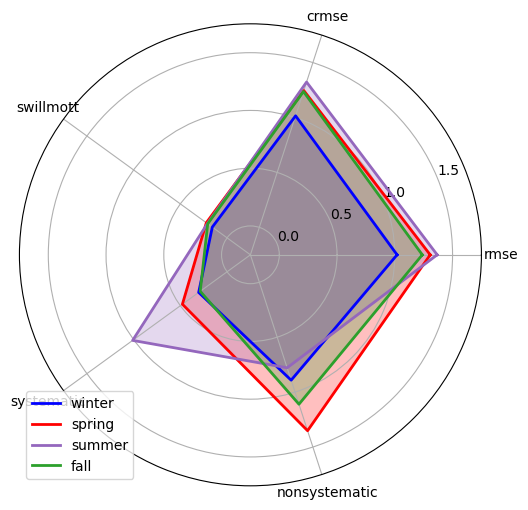

In [23]:
# set up data
categories, values_winter, values_summer, values_spring, values_fall = split_into_seasons(results_202111)

num_sets = 4

# make the plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

for i in range(num_sets):
    if i == 0:
        ax.fill(angles, values_winter, color='blue', alpha=0.25)
        ax.plot(angles, values_winter, color='blue', linewidth=2, label='winter')
    if i == 1:
        ax.fill(angles, values_spring, color='red', alpha=0.25)
        ax.plot(angles, values_spring, color='red', linewidth=2, label='spring')
    if i == 2:
        ax.fill(angles, values_summer, color='tab:purple', alpha=0.25)
        ax.plot(angles, values_summer, color='tab:purple', linewidth=2, label='summer')
    if i == 3:
        ax.fill(angles, values_fall, color='tab:green', alpha=0.25)
        ax.plot(angles, values_fall, color='tab:green', linewidth=2, label='fall')

# # add the text labels
# for i, (angle, value) in enumerate(zip(angles, values_winter)):
#     ax.text(angle, value, f'{round(value,2)}', ha='center', va='center')

# for i, (angle, value) in enumerate(zip(angles, values_spring)):
#     ax.text(angle, value, f'{round(value, 2)}', ha='center', va='center')

# for i, (angle, value) in enumerate(zip(angles, values_summer)):
#     ax.text(angle, value, f'{round(value, 2)}', ha='center', va='center')

# for i, (angle, value) in enumerate(zip(angles, values_fall)):
#     ax.text(angle, value, f'{round(value, 2)}', ha='center', va='center')

# labels and stuff
# ax.set_yticklabels([' '])  # Adjust labels as needed
ax.set_yticks([0, 0.5, 1.0, 1.5])
ax.set_ylim([-0.25, 1.75])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend()

plt.show()

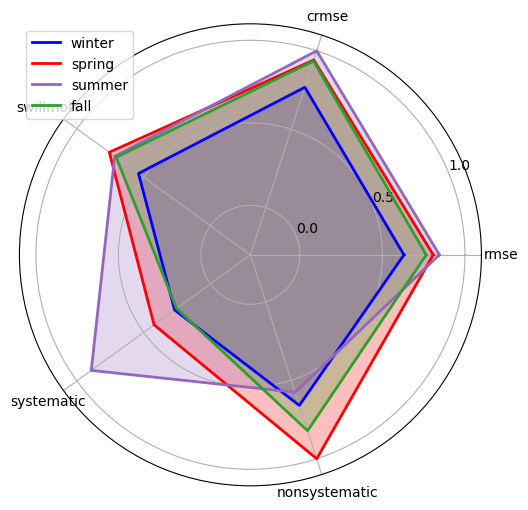

In [24]:
# set up data
categories, values_winter, values_summer, values_spring, values_fall = split_into_seasons(results_norm_202111)

num_sets = 4

# make the plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

for i in range(num_sets):
    if i == 0:
        ax.fill(angles, values_winter, color='blue', alpha=0.25)
        ax.plot(angles, values_winter, color='blue', linewidth=2, label='winter')
    if i == 1:
        ax.fill(angles, values_spring, color='red', alpha=0.25)
        ax.plot(angles, values_spring, color='red', linewidth=2, label='spring')
    if i == 2:
        ax.fill(angles, values_summer, color='tab:purple', alpha=0.25)
        ax.plot(angles, values_summer, color='tab:purple', linewidth=2, label='summer')
    if i == 3:
        ax.fill(angles, values_fall, color='tab:green', alpha=0.25)
        ax.plot(angles, values_fall, color='tab:green', linewidth=2, label='fall')

# # add the text labels
# for i, (angle, value) in enumerate(zip(angles, values_winter)):
#     ax.text(angle, value, f'{round(value,2)}', ha='center', va='center')

# for i, (angle, value) in enumerate(zip(angles, values_spring)):
#     ax.text(angle, value, f'{round(value, 2)}', ha='center', va='center')

# for i, (angle, value) in enumerate(zip(angles, values_summer)):
#     ax.text(angle, value, f'{round(value, 2)}', ha='center', va='center')

# for i, (angle, value) in enumerate(zip(angles, values_fall)):
#     ax.text(angle, value, f'{round(value, 2)}', ha='center', va='center')

# labels and stuff
# ax.set_yticklabels([' '])  # Adjust labels as needed
ax.set_yticks([0, 0.5, 1.0, 1.5])
ax.set_ylim([-0.3, 1.1])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend()

plt.show()

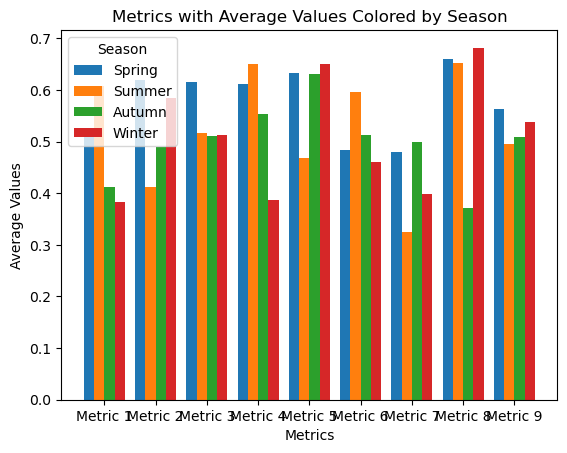

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data: 9 metrics, each with 8 data points, colored by season
metrics = ['Metric 1', 'Metric 2', 'Metric 3', 'Metric 4', 'Metric 5', 'Metric 6', 'Metric 7', 'Metric 8', 'Metric 9']
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']

# Generate random data for each metric and season
data = np.random.rand(9, 8, 4)

# Create the plot
fig, ax = plt.subplots()

# Set the width of the bars
bar_width = 0.2
bar_positions = np.arange(len(metrics))

# Plot each metric with different colors for each season
for i, season in enumerate(seasons):
    ax.bar(bar_positions + i * bar_width - (bar_width * (len(seasons) - 1) / 2),
           data[:, :, i].mean(axis=1), width=bar_width, label=season)

# Set labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Average Values')
ax.set_title('Metrics with Average Values Colored by Season')

# Set x-axis ticks and labels
ax.set_xticks(bar_positions)
ax.set_xticklabels(metrics)

# Add a legend
ax.legend(title='Season')

# Show the plot
plt.show()

In [15]:
results_best = results_202111.drop(columns=['model','number'])
results_best

,bias,rmse,crmse,swillmott,slopedev,const,systematic,nonsystematic,spread,region,season
11,0.066712,1.238026,1.236227,0.207014,0.180331,5.278283,0.287279,1.110082,0.227408,Nooksack,fall
33,-0.094260,1.019673,1.015307,0.158003,0.197042,5.498010,0.303891,0.891361,0.269232,Nooksack,winter
55,-0.395056,1.306509,1.245350,0.222088,-0.193308,-5.867456,0.477866,1.351363,-0.258862,Nooksack,spring
77,0.344339,1.366819,1.322734,0.210225,0.492180,13.946770,1.010633,0.778457,0.646189,Nooksack,summer


In [16]:
def compare_stats(res_201905R, res_202111, metric):
    if np.abs(res_201905R[metric].values[0]) < np.abs(res_202111[metric].values[0]):
        return '201905R'
    elif np.abs(res_201905R[metric].values[0]) > np.abs(res_202111[metric].values[0]):
        return '202111'
    else:
        return 'same'

In [17]:
def compile_compare(res_201905R, res_202111, metric, regions):
    met_vec = []
    for region in regions:
        met_vec = met_vec + [compare_stats(res_201905R[res_201905R['region'] == region], res_202111[res_202111['region'] == region], metric)]
    return met_vec

In [18]:
regions = results_202111.region.to_list()
for metric in results_best.columns[1:]:
    results_best[metric] = compile_compare(results_201905R, results_202111, metric, regions)
results_best

UFuncTypeError: ufunc 'absolute' did not contain a loop with signature matching types <class 'numpy.dtype[str_]'> -> None

Text(0.5, 1.0, 'Number of Obs Per Region')

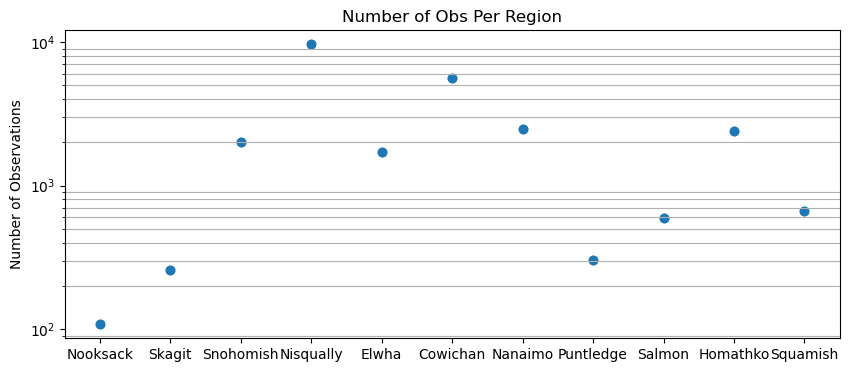

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

ax.grid(axis='y', which='minor')
ax.scatter(results_all['region'], results_all['number'])
ax.set_yscale('log')

ax.set_ylabel(r'Number of Observations')
ax.set_title('Number of Obs Per Region')

bias improved in 202111 for: Nooksack, Skagit, Snohomish, Nisqually, Cowichan, Nanaimo, Salmon, Squamish


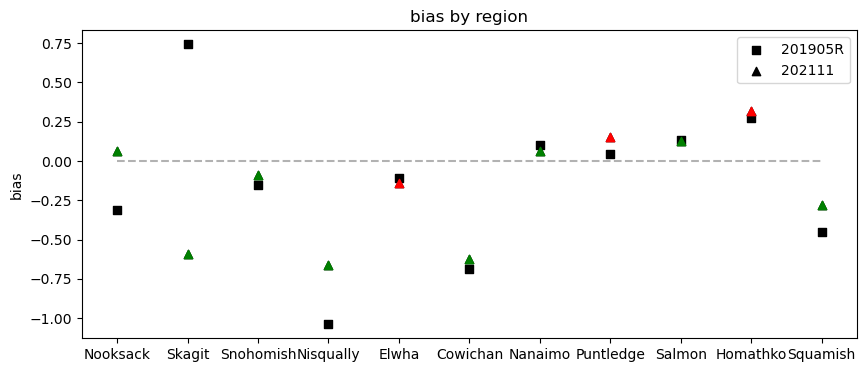

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'bias'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_bias_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

rmse improved in 202111 for: Nooksack, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Puntledge, Salmon, Homathko, Squamish


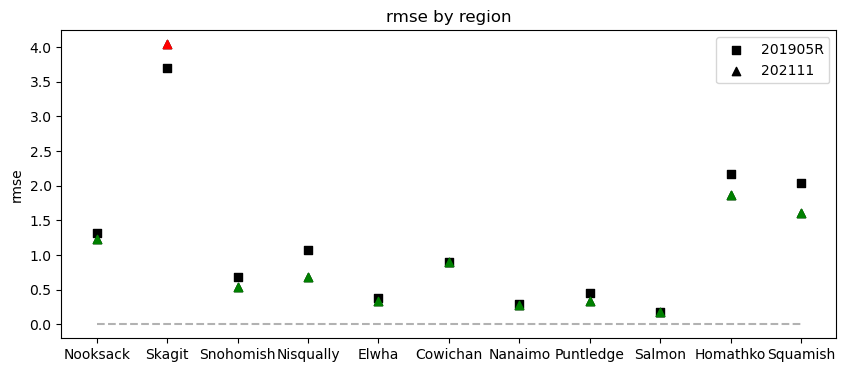

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'rmse'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_rmse_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

crmse improved in 202111 for: Nooksack, Snohomish, Nisqually, Elwha, Nanaimo, Puntledge, Homathko, Squamish


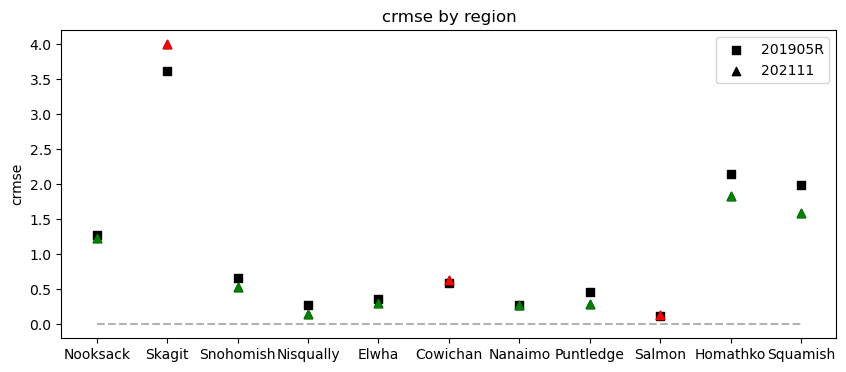

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'crmse'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_crmse_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

swillmott improved in 202111 for: Nooksack, Skagit, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Puntledge, Salmon, Homathko, Squamish


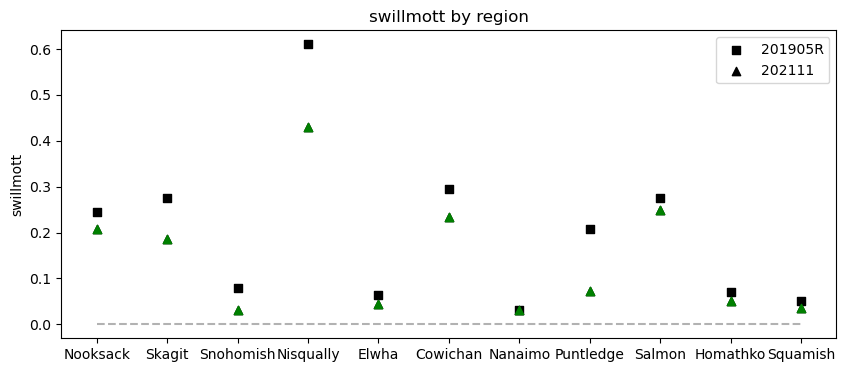

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'swillmott'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_swillmott_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

slopedev improved in 202111 for: Nooksack, Skagit, Snohomish, Nisqually, Elwha, Nanaimo, Puntledge, Salmon, Homathko, Squamish


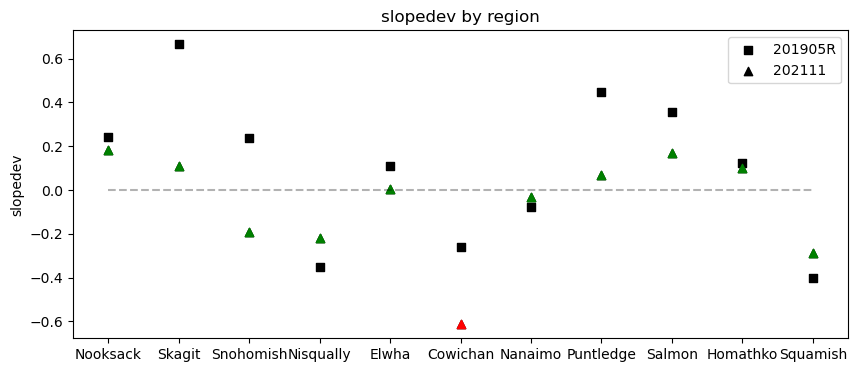

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'slopedev'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_slopedev_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

const improved in 202111 for: Nooksack, Skagit, Snohomish, Nisqually, Elwha, Nanaimo, Puntledge, Salmon, Homathko, Squamish


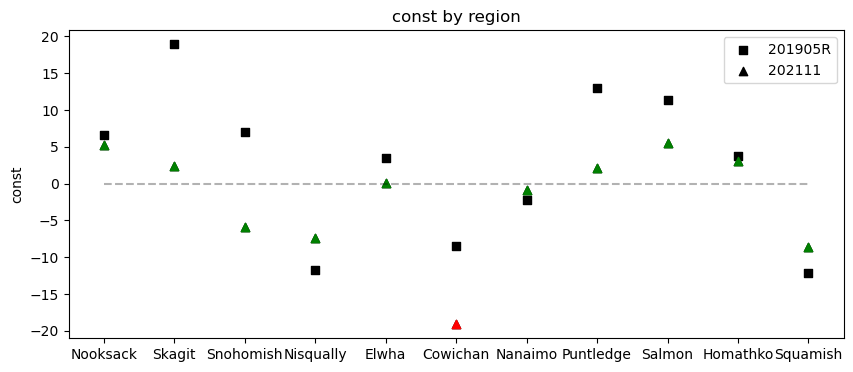

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'const'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_const_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

systematic improved in 202111 for: Nooksack, Skagit, Snohomish, Nisqually, Nanaimo, Puntledge, Salmon, Homathko, Squamish


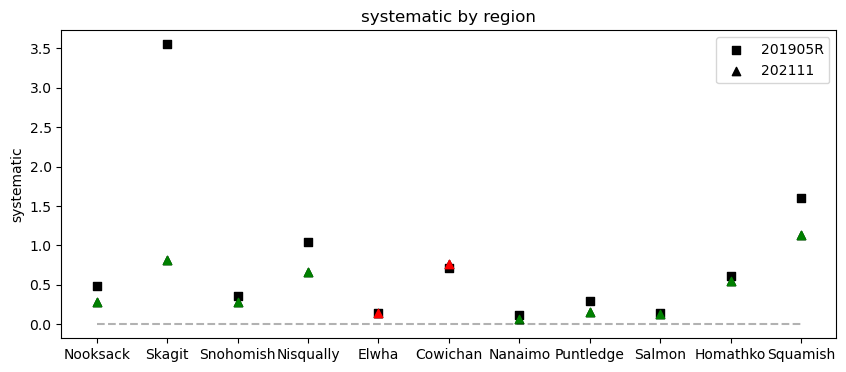

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'systematic'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_systematic_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

nonsystematic improved in 202111 for: Snohomish, Nisqually, Elwha, Nanaimo, Puntledge, Homathko, Squamish


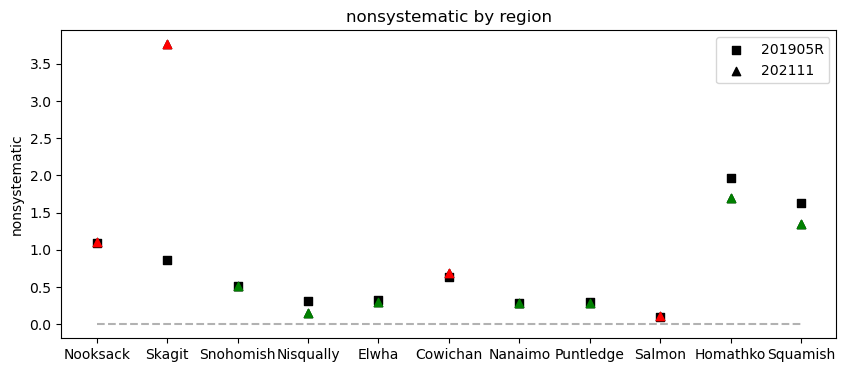

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'nonsystematic'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_nonsystematic_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

spread improved in 202111 for: Nooksack, Skagit, Nisqually, Elwha, Nanaimo, Puntledge, Salmon, Homathko, Squamish


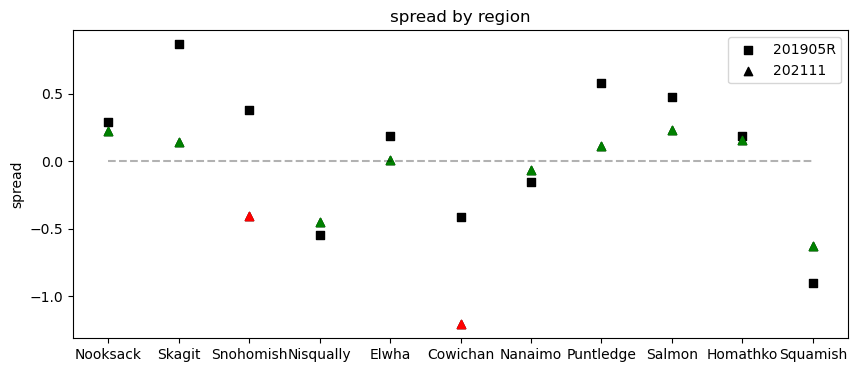

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'spread'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

# ax.set_ylim([-1.5, 1.5])  # cropping the nanaimo data which includes all of the ferry data


plt.savefig('stats_spread_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)